In [1]:
#importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf
%matplotlib inline

<h2> Importing Data </h2>

In [2]:
# define column names for easy indexing

col_names = ['unit_number','time_in_cycles','op_setting_1','op_setting_2','op_setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
           
# read text file into pandas DataFrame
turbo_engine = pd.read_csv('Data/train_FD001.txt', sep='\s+', header=None, names=col_names)


<h2> Analysing the variables present in the dataset </h2>

In [3]:
turbo_engine.head(10)

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


In [4]:
turbo_engine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   op_setting_1    20631 non-null  float64
 3   op_setting_2    20631 non-null  float64
 4   op_setting_3    20631 non-null  float64
 5   T2              20631 non-null  float64
 6   T24             20631 non-null  float64
 7   T30             20631 non-null  float64
 8   T50             20631 non-null  float64
 9   P2              20631 non-null  float64
 10  P15             20631 non-null  float64
 11  P30             20631 non-null  float64
 12  Nf              20631 non-null  float64
 13  Nc              20631 non-null  float64
 14  epr             20631 non-null  float64
 15  Ps30            20631 non-null  float64
 16  phi             20631 non-null  float64
 17  NRf             20631 non-null 

In [5]:
#turbo_engine[['Nf_dmd','htBleed','op_setting_3']].describe()
turbo_engine.describe()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


<h2> Checking if any of the variables have missing values </h2>

<AxesSubplot:>

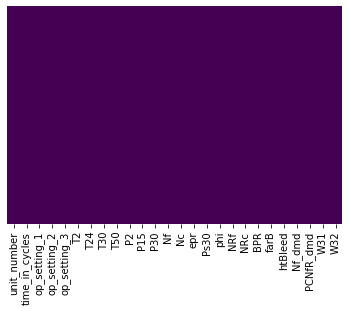

In [6]:
sns.heatmap(turbo_engine.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<h2> Dropping columns haviing STD = 0 and variables which do not carry any information </h2>

In [7]:
#delete columns which are constant (std=0)
turbo_engine = turbo_engine.loc[:, turbo_engine.std() > 0.0]

#delete columns ​​that do not carry information 
turbo_engine.drop(columns=['P2','farB'],inplace=True)

<h2> Plotting Correlation Heatmap for Exploratory Data Analysis</h2>

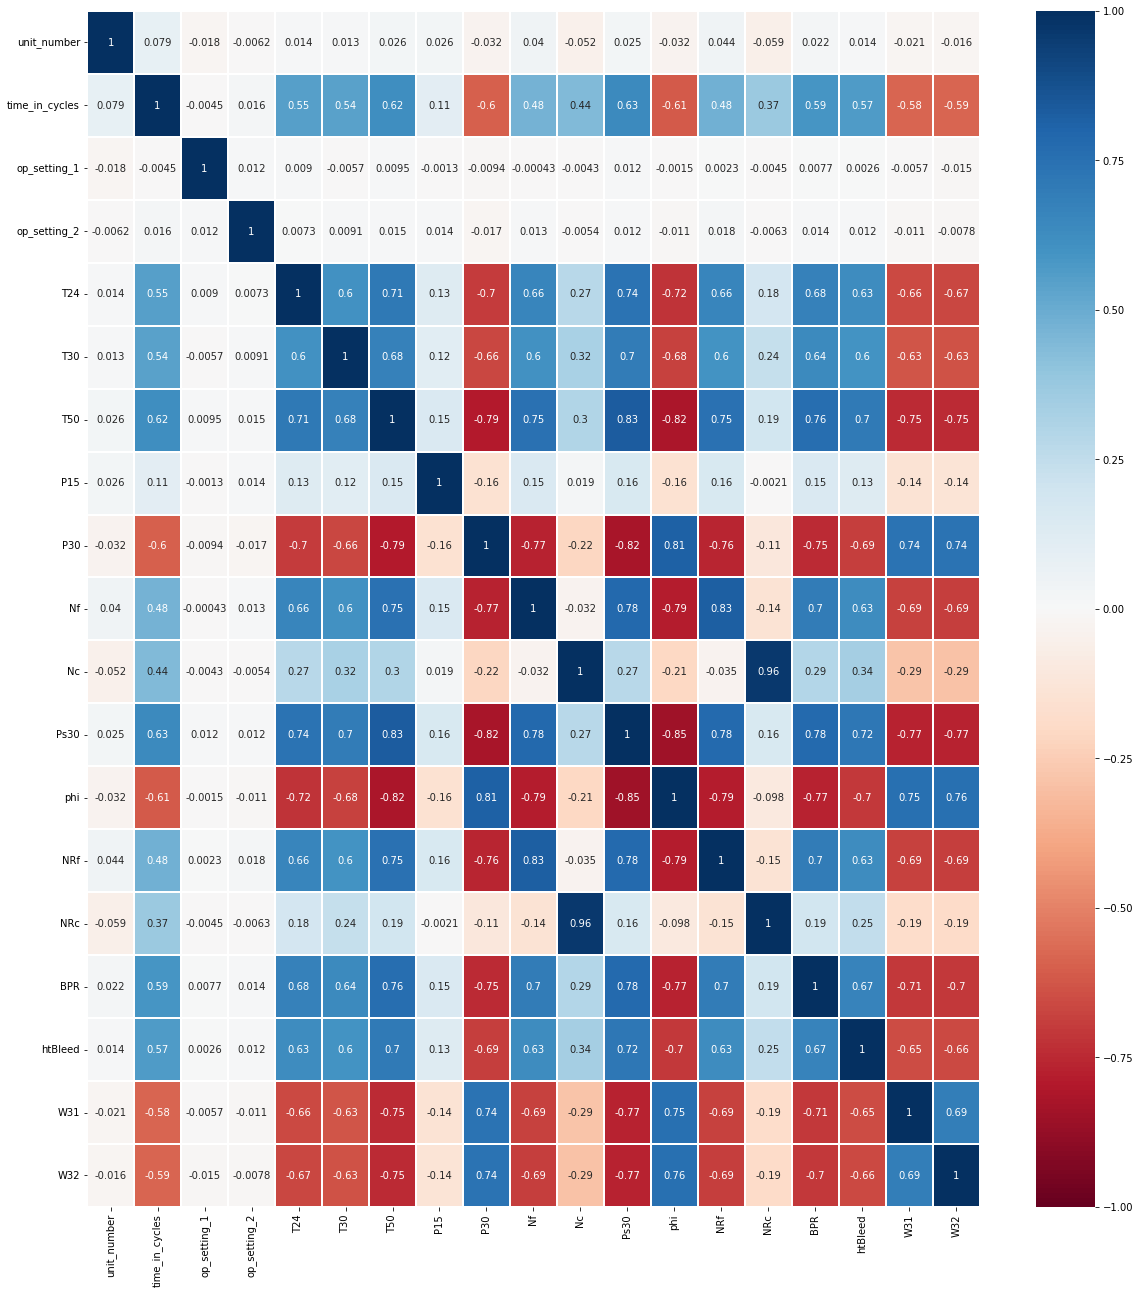

In [8]:
corr = turbo_engine.corr()
sns.heatmap(corr,cmap='RdBu', vmin=-1, vmax=1, annot=True,linewidths=0.2, xticklabels=True, yticklabels=True)
fig=plt.gcf()
fig.set_size_inches(20,22)
plt.show()

<p> After observing above heatmap, <b> Nc and NRc </b> are highly correlate (0.96) so dropping Nc column </p>

<p> Also, we can observe that <b>'setting_1' 'setting_2' and 'P15'</b> correlation is low with all the other columns </p>

<p> Hence all of these columns are dropped </p>

In [9]:
turbo_engine = turbo_engine.drop(columns = ['op_setting_1','op_setting_2','P15','Nc'])

<h2> Plotting distributions of all features using histplot </h2>

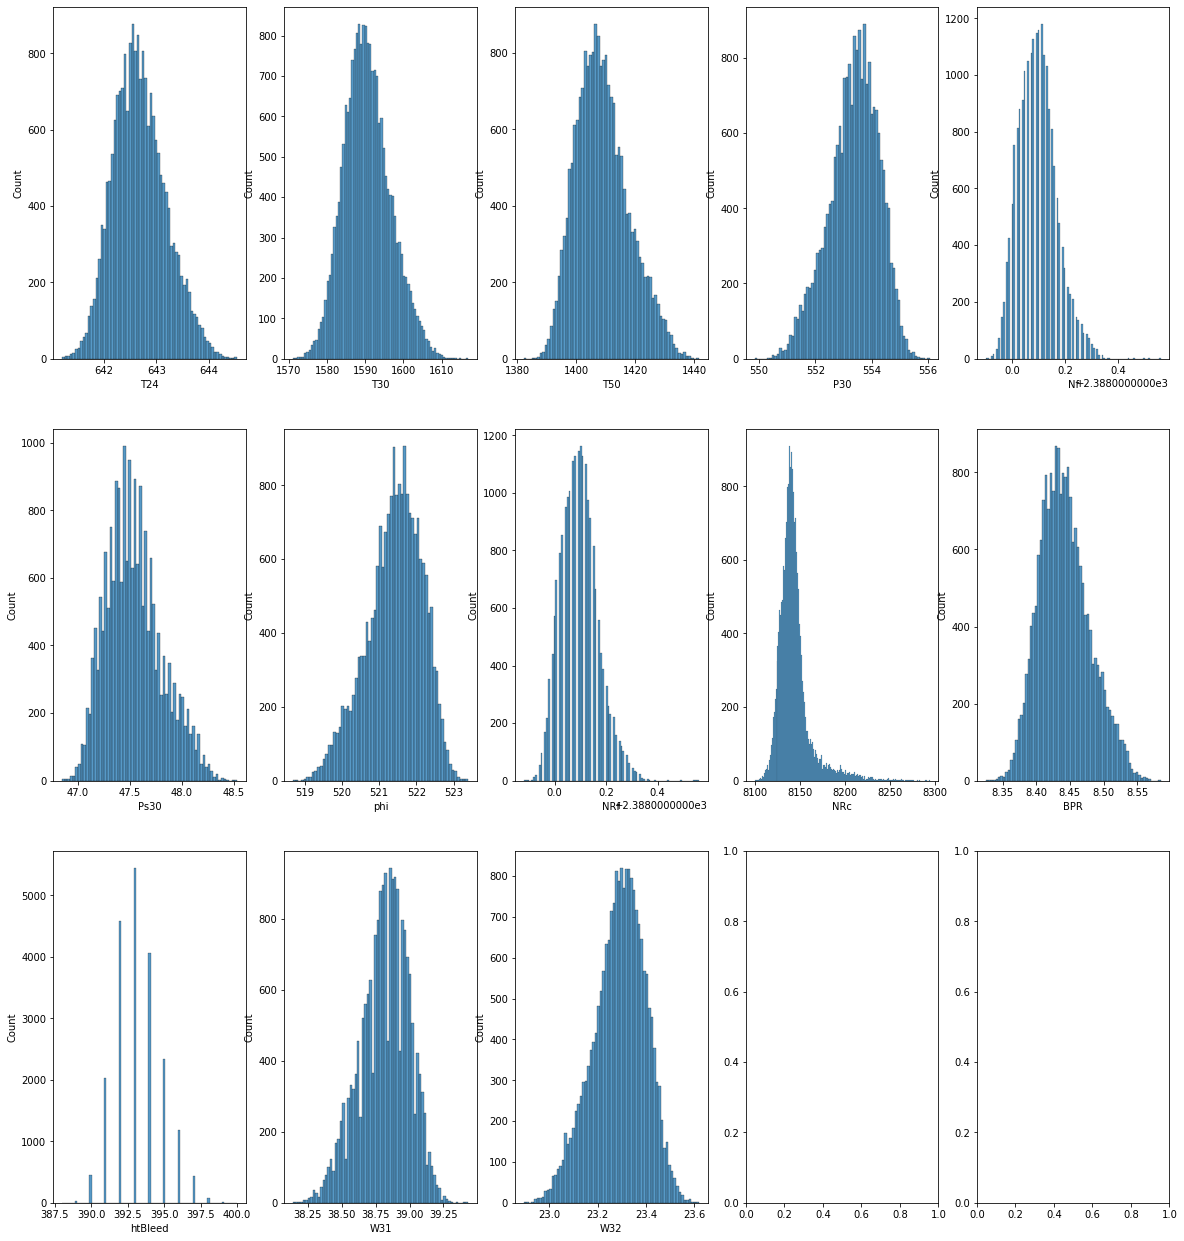

In [10]:
# Define the number of rows and columns you want

n_rows=3
n_cols=5

# Create the subplots

colums_for_distribution = ['T24', 'T30', 'T50', 'P30', 'Nf',
       'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32']

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(20,22)
for i, column in enumerate(colums_for_distribution):
    sns.histplot(turbo_engine[column],ax=axes[i//n_cols,i%n_cols])

<h2> Value ranges for all columns </h2>

In [11]:
col_ranges = turbo_engine.max() - turbo_engine.min()
col_ranges

unit_number        99.0000
time_in_cycles    361.0000
T24                 3.3200
T30                45.8700
T50                59.2400
P30                 6.2100
Nf                  0.6600
Ps30                1.6800
phi                 4.6900
NRf                 0.6800
NRc               193.7800
BPR                 0.2599
htBleed            12.0000
W31                 1.2900
W32                 0.7242
dtype: float64

<h2> Data Visualization using Box Plot </h2>

{'whiskers': [<matplotlib.lines.Line2D at 0x2bb48e207f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bb48e20f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bb48e20460>],
 'medians': [<matplotlib.lines.Line2D at 0x2bb48e29670>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bb48e29a00>],
 'means': []}

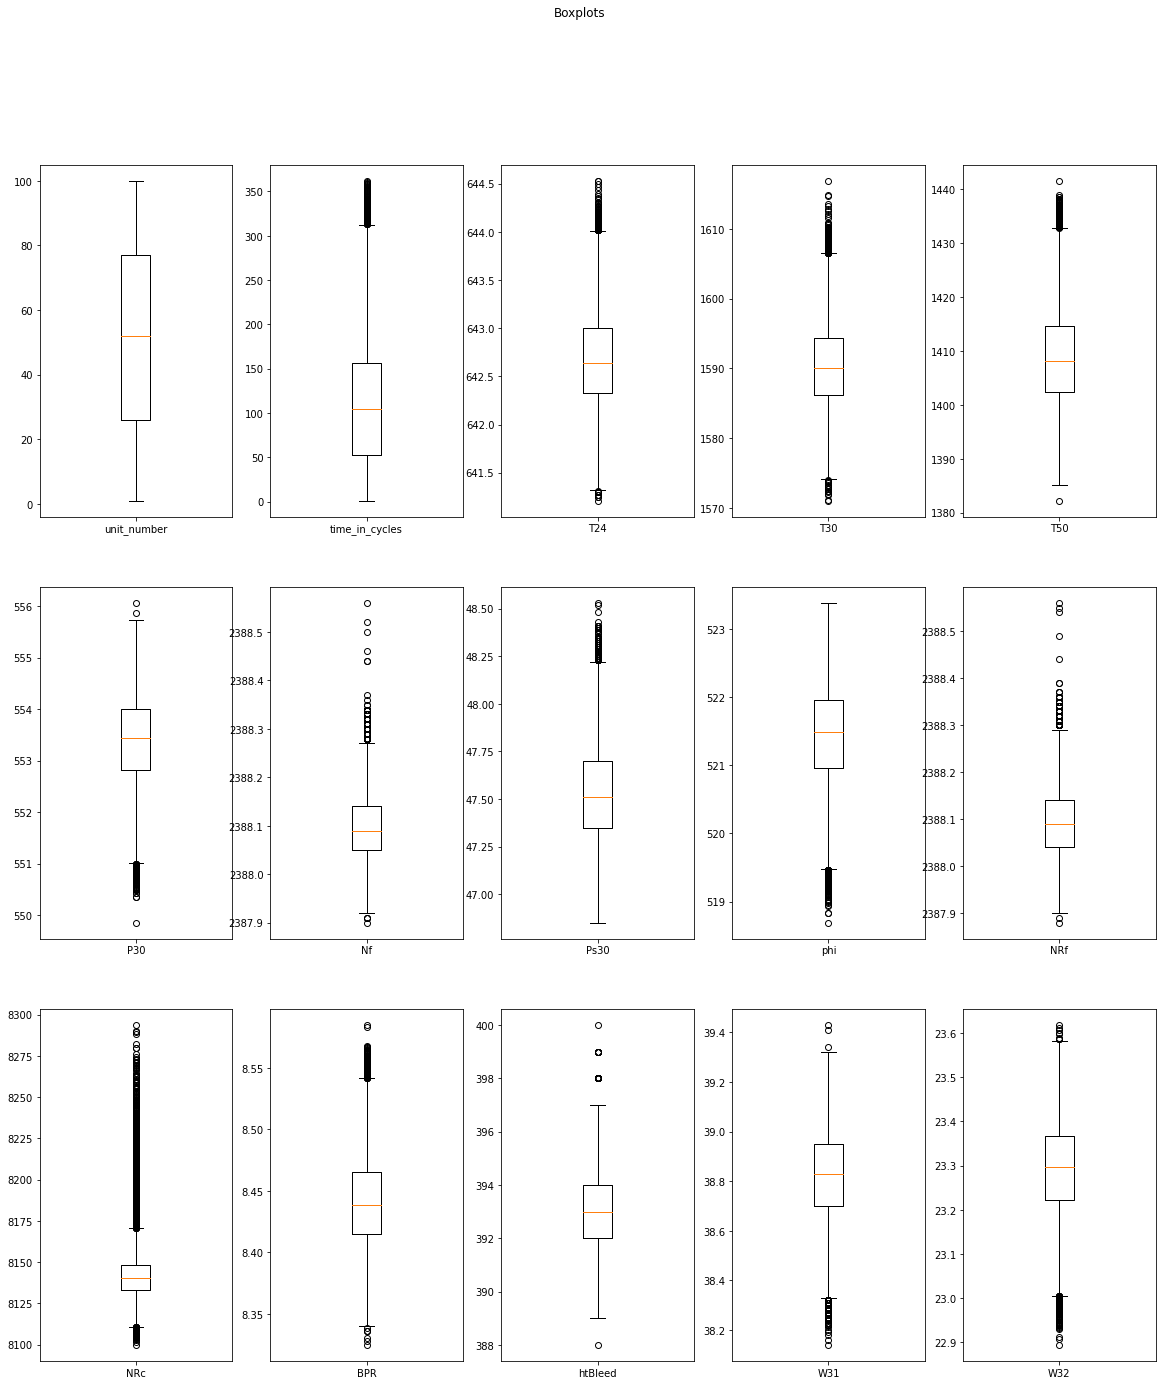

In [12]:
fig1, axs = plt.subplots(3,5)
fig1.set_size_inches(20,22)
fig1.suptitle('Boxplots')
axs[0,0].boxplot(turbo_engine.iloc[:,0], labels=['unit_number'])
axs[0,1].boxplot(turbo_engine.iloc[:,1], labels=['time_in_cycles'])
axs[0,2].boxplot(turbo_engine.iloc[:,2], labels=['T24'])
axs[0,3].boxplot(turbo_engine.iloc[:,3], labels=['T30'])
axs[0,4].boxplot(turbo_engine.iloc[:,4], labels=['T50'])
axs[1,0].boxplot(turbo_engine.iloc[:,5], labels=['P30'])
axs[1,1].boxplot(turbo_engine.iloc[:,6], labels=['Nf'])
axs[1,2].boxplot(turbo_engine.iloc[:,7], labels=['Ps30'])
axs[1,3].boxplot(turbo_engine.iloc[:,8], labels=['phi'])
axs[1,4].boxplot(turbo_engine.iloc[:,9], labels=['NRf'])
axs[2,0].boxplot(turbo_engine.iloc[:,10], labels=['NRc'])
axs[2,1].boxplot(turbo_engine.iloc[:,11], labels=['BPR'])
axs[2,2].boxplot(turbo_engine.iloc[:,12], labels=['htBleed'])
axs[2,3].boxplot(turbo_engine.iloc[:,13], labels=['W31'])
axs[2,4].boxplot(turbo_engine.iloc[:,14], labels=['W32'])

<p> <b>We can infer from the boxplot the following points:</b>

<i>We said before in the distribution plots of all the variables that variables BPR, T24, T30, T50, Ps30, htBleed have a normal distribution. Here we can confirm this because its boxplots are in the middle of the y-axis. The same for the variables P30, phi, and W32 which are right-skewed (we can see that their boxplots are above the middle of the y-axis), and Ps30, NRc are left-skewed (their boxplots are below the middle of the y-axis).  These graphics that are skewed  present heavy tails. </i>

<i>We can see that in some boxplots, such as the ones of the variables htBleed,T50 or P30 there are some samples out of the range of the boxplots. We have to study these cases more carefully because they can be outliers.</i>

<i>It seems that the data is scattered because the distance between the minimum and the maximum of the boxplot is big.</i></p>
